# 2. Data preparation and pre-processing

### 2.0 Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

2023-02-20 13:51:21.208713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 13:51:21.457948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-20 13:51:21.457997: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 13:51:23.606399: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import boto3
from boto3 import session
import os

key_id = os.environ.get("AWS_ACCESS_KEY_ID")
secret_key = os.environ.get("AWS_SECRET_ACCESS_KEY")
bucket_name = os.environ.get("AWS_S3_BUCKET")
s3_endpoint = os.environ.get("AWS_S3_ENDPOINT")

s3_client = boto3.client("s3", aws_access_key_id=key_id, aws_secret_access_key=secret_key, endpoint_url=s3_endpoint)

### 2.1 Loading data

In [3]:
! mkdir -p tmp

In [4]:
s3_client.download_file(bucket_name, "/data/train.csv", '/tmp/train.csv')
s3_client.download_file(bucket_name, "/data/test.csv", '/tmp/test.csv')

In [5]:
df_train = pd.read_csv('/tmp/train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test = pd.read_csv('/tmp/test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Checking for missing values

In [7]:
df_train.isna().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
df_test.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:, 0]
print(X.shape, y.shape)

(42000, 784) (42000,)


> <div class="alert alert-block alert-info">
    <b>No missing data, let's continue.</b></div>


### 2.3 Data and target class visualizations

<AxesSubplot: >

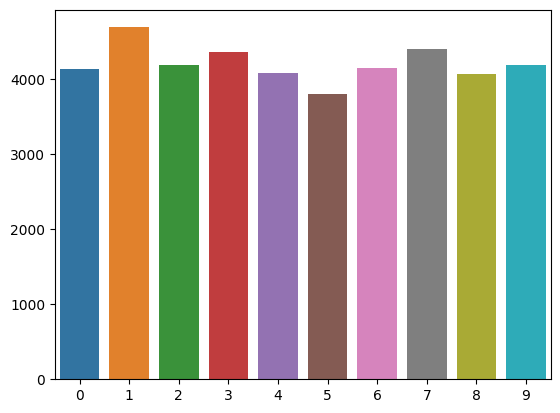

In [11]:
sns.barplot(x=y.value_counts().index, y=y.value_counts().values)

> <div class="alert alert-block alert-info">
    <b>As you can see, there is a fairly even class distribution.</b></div>

(28, 28)


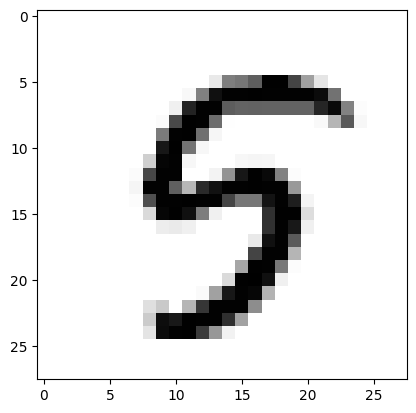

In [12]:
z = np.reshape(X.iloc[8].values, (28,28))
print(z.shape)
plt.imshow(z, cmap='Greys')

> <div class="alert alert-block alert-info">
    <b>Here is an example of one of the digits. It is a 28 x 28 black and white image.</b></div>

### 2.4 Creating training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=15)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(37800, 784) (4200, 784) (37800,) (4200,)


> <div class="alert alert-block alert-info">
<b>We now need to split the training data into two sets; training and validation. We will train on 90% of the data, and use the remaining 10% to evaluate the model during training.</b></div>

### 2.5 Pre-processing pipelines

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

In [17]:
class ReshapeFunc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.reshape((-1,28,28,1))
        return X

> <div class="alert alert-block alert-info">
<b>Custom transformer was created to add a channel dimension to the input (X) data. As the image is black and white we only have 1 channel. In the case of a coloured image we would require 3 channels (red blue green).</b></div>

In [18]:
features_pipeline = Pipeline(steps=[
    ('Normalize', MinMaxScaler()),
    ('Reshape', ReshapeFunc())
])

> <div class="alert alert-block alert-info">
    <b>Feature pipeline. Data is scaled between 0 and 1 and then reshaped into input format.</b></div>

In [19]:
X_train = features_pipeline.fit_transform(X_train)

In [20]:
from sklearn.preprocessing import OneHotEncoder
target_pipeline = Pipeline(steps=[
    ('OneHot', OneHotEncoder())
])

> <div class="alert alert-block alert-info">
<b>Target pipeline. One hot encoding is used, as we will be using a softmax activation function in the output node.</b></div>

In [21]:
y_train = target_pipeline.fit_transform(y_train.values.reshape(-1,1))

In [22]:
y_train = y_train.toarray()

In [23]:
print(X_train.shape, y_train.shape)

(37800, 28, 28, 1) (37800, 10)


> <div class="alert alert-block alert-info">
    <b>Don't forget to apply the preprocessing pipeline to the validation data!</b></div>

In [24]:
X_val = features_pipeline.fit_transform(X_val)

In [25]:
y_val = target_pipeline.fit_transform(y_val.values.reshape(-1, 1))

In [26]:
y_val = y_val.toarray()

In [27]:
print(X_val.shape, y_val.shape)

(4200, 28, 28, 1) (4200, 10)


> <div class="alert alert-block alert-info">
    <b>and test data..</b></div>

In [28]:
X_test = features_pipeline.fit_transform(df_test)

### 2.6 Export data

In [29]:
np.save('./tmp/X_train.npy', X_train)
np.save('./tmp/y_train.npy', y_train)
np.save('./tmp/X_val.npy', X_val)
np.save('./tmp/y_val.npy', y_val)
np.save('./tmp/X_test.npy', X_test)